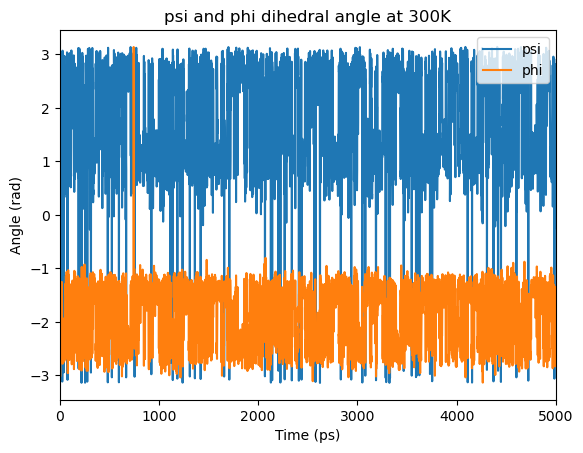

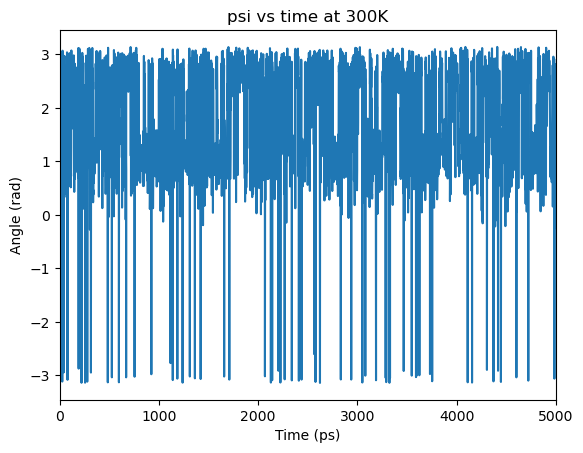

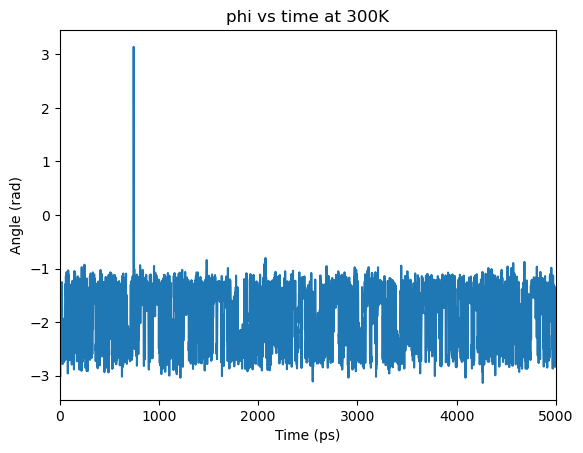

In [3]:
# this notebook is for plotting 2D histogram of psi and phi
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt

#load mdtraj
import mdtraj as md
import os

traj = md.load('adp_md.trr', top='adp_md.gro')

# compute psi
psi=md.compute_psi(traj,periodic=True,opt=True)
y_psi=psi[1].flatten()
#print(y_psi)

#compute_phi
phi=md.compute_phi(traj,periodic=True,opt=True)
y_phi=phi[1][:,0]
#print(y_phi)

#contruct time
time= np.array(list(range(0,5001)))

#plot
plt.plot(time,y_psi,label="psi")
plt.plot(time,y_phi,label="phi")
plt.legend(loc="upper right")
plt.legend(loc="upper right")
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('psi and phi dihedral angle at 300K')
plt.xlim([0,5000])
plt.savefig('psi vs phi at 300K.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

plt.plot(time,y_psi)
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('psi vs time at 300K')
plt.xlim([0,5000])
plt.savefig('psi vs time.pdf at 300K',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

plt.plot(time,y_phi)
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('phi vs time at 300K')
plt.xlim([0,5000])
plt.savefig('phi vs time at 300K.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

In [4]:
# np.histogram2d(y_phi, y_psi, bins=100, range=None, normed=True, weights=None, density=None)
H, xedges, yedges = np.histogram2d(y_phi, y_psi, bins=100, normed=True)
F=H
H=H.T
print(H)
H=-np.log(H)
print(H)
H=H-H.min()
# fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(131, title='Negative Log of Histogram of Phi and Psi of ADP for T=300K')
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.title('Negative Log of Histogram of Phi and Psi of ADP for T=300K')
# plt.colorbar(F[3])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.savefig('Negative Log of Histogram of Phi and Psi of ADP for T=300K.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


[[0.         0.05077518 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.15232555 ... 0.         0.         0.05077518]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[       inf 2.98034758        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 ...
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf 1.88173529 ...        inf        inf 2.98034758]
 [       inf        inf        inf ...        inf        inf        inf]]


/state/partition1/job-26240049/ipykernel_953631/3548034956.py:6: RuntimeWarning: divide by zero encountered in log
  H=-np.log(H)


NameError: name 'fig' is not defined

In [38]:
np.histogram2d(y_phi, y_psi, bins=100, range=None, normed=True, weights=None, density=None)
ax = fig.add_subplot(133, title='NonUniformImage: interpolated',
        aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
im = NonUniformImage(ax, interpolation='bilinear')
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
im.set_data(xcenters, ycenters, H)
ax.images.append(im)
plt.show()

In [2]:
print(psi)

(array([[ 6,  8, 14, 16]]), array([[2.791988 ],
       [2.6999454],
       [2.5052204],
       ...,
       [2.8124833],
       [2.65125  ],
       [2.6638472]], dtype=float32))
